In [18]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [53]:
# load Dataset
OF = pd.read_pickle("Related_dataset/Opinion_Finder_result.pkl")
GPOMS = pd.read_pickle("Related_dataset/GPOMS_result.pkl")
DJIA = pd.read_csv("Related_dataset/DJIA_price.csv")

# process GPOMS data
GPOMS_pivot = GPOMS.drop(columns=['tweets_processed', 'tweet_size', 'GPOMS_preprocess_data', 'GPOMS_sum','sum_index', 'avg_index'])
GPOMS_pivot[['Calm','Kind','Happy','Alert','Sure','Vital']] = pd.DataFrame(GPOMS.GPOMS_avg.tolist(), index= GPOMS.index)
GPOMS_pivot = GPOMS_pivot.drop(['GPOMS_avg'], axis=1)
GPOMS_pivot = GPOMS_pivot.reset_index()
GPOMS_pivot = GPOMS_pivot.rename({'date_prune': 'Dates'}, axis=1) 

# process OF data
OF = pd.read_pickle("Related_dataset/Opinion_Finder_result.pkl")
OF = OF.reset_index()
OF = OF.rename(columns={'date_prune': 'Dates'})
OF = OF.drop(columns=['tweets_processed', 'tweet_size'])

# process DJIA data
DJIA = DJIA.drop(["High", "Low", "Open", "Volume", 'Close'], axis=1)
DJIA = DJIA.rename({'Date': 'Dates'}, axis=1) 

combine_df = OF.merge(GPOMS_pivot, on='Dates')
combine_df = combine_df.merge(DJIA, on='Dates')
combine_df['Dates'] = pd.to_datetime(combine_df['Dates'], format="%Y-%m-%d")
combine_df = combine_df.set_index('Dates')
combine_df

,OF_transform,Calm,Kind,Happy,Alert,Sure,Vital,Adj Close
Dates,,,,,,,,
2020-04-09,-0.380042,0.073364,0.191523,-0.115305,0.346767,0.136158,0.155670,23719.369141
2020-04-13,0.144374,0.079693,0.222743,-0.091400,0.338160,0.130949,0.137338,23390.769531
2020-04-14,-0.343949,0.080006,0.206345,-0.146017,0.345684,0.172988,0.127082,23949.759766
2020-04-15,-0.246285,0.080893,0.181169,-0.125975,0.354787,0.153545,0.149819,23504.349609
2020-04-16,-0.787686,0.067131,0.180237,-0.132302,0.353258,0.162414,0.132982,23537.679688
2020-04-17,-0.116773,0.081926,0.169273,-0.140061,0.332510,0.241158,0.156782,24242.490234
2020-04-20,-0.273885,0.078972,0.180450,-0.130168,0.344971,0.150686,0.139397,23650.439453
2020-04-21,-0.443737,0.079518,0.173809,-0.116639,0.328183,0.135199,0.139521,23018.880859
2020-04-22,-0.316348,0.077020,0.178485,-0.088017,0.319640,0.136239,0.104472,23475.820312


In [54]:
combine_df.describe()

,OF_transform,Calm,Kind,Happy,Alert,Sure,Vital,Adj Close
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,-0.212795,0.079510,0.187004,-0.103316,0.344601,0.145912,0.131117,25257.047981
std,0.274382,0.020468,0.021931,0.020549,0.019141,0.019440,0.022275,1221.115398
min,-1.000000,-0.035162,0.129073,-0.153267,0.306732,0.116737,0.069468,23018.880859
25%,-0.326964,0.073760,0.171102,-0.116639,0.330449,0.134051,0.118743,23949.759766
50%,-0.197452,0.080464,0.184610,-0.102748,0.344220,0.144709,0.130723,25706.089844
75%,-0.038217,0.087330,0.199534,-0.091400,0.355787,0.153545,0.141957,26085.800781
max,0.411890,0.116709,0.243628,-0.065880,0.402302,0.241158,0.182292,27572.439453


# Part 1: OF v.s. GPOMS

In [55]:
# Normalize
data1 = combine_df.copy()
data1=(data1-data1.mean())/data1.std()
data1.describe()

,OF_transform,Calm,Kind,Happy,Alert,Sure,Vital,Adj Close
count,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01
mean,-1.324936e-16,6.547436e-16,-1.117162e-15,8.871310e-16,4.248174e-15,1.365260e-15,-1.214961e-16,1.315510e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.869011e+00,-5.602431e+00,-2.641597e+00,-2.430819e+00,-1.978442e+00,-1.500758e+00,-2.767597e+00,-1.832887e+00
25%,-4.160949e-01,-2.809185e-01,-7.251201e-01,-6.483452e-01,-7.393635e-01,-6.101117e-01,-5.554905e-01,-1.070569e+00
50%,5.591732e-02,4.661029e-02,-1.091684e-01,2.765137e-02,-1.994315e-02,-6.185774e-02,-1.768084e-02,3.677309e-01
75%,6.362603e-01,3.820437e-01,5.713376e-01,5.798717e-01,5.844126e-01,3.926622e-01,4.866516e-01,6.786851e-01
max,2.276696e+00,1.817376e+00,2.581971e+00,1.821775e+00,3.014528e+00,4.899529e+00,2.297360e+00,1.896128e+00


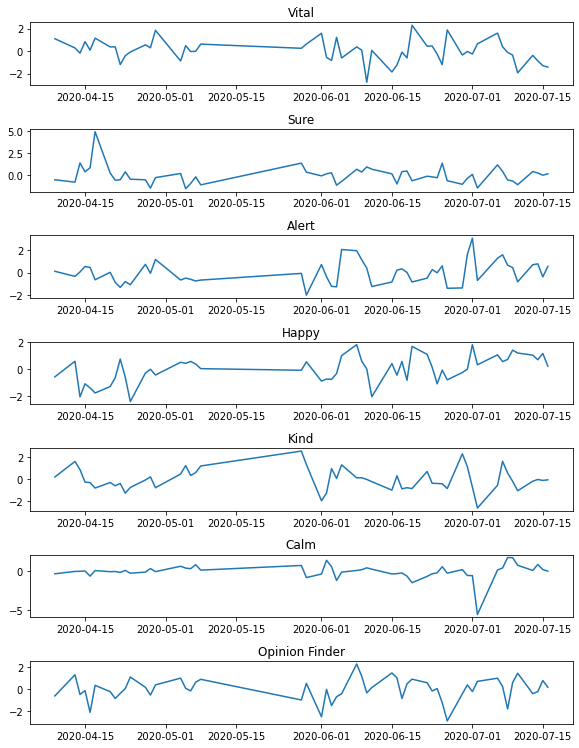

In [56]:
# Placing the plots in the plane
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
n = 7
plot1 = plt.subplot2grid((n, n), (6, 0), colspan=3) 
plot2 = plt.subplot2grid((n, n), (5, 0), colspan=3) 
plot3 = plt.subplot2grid((n, n), (4, 0), colspan=3) 
plot4 = plt.subplot2grid((n, n), (3, 0), colspan=3) 
plot5 = plt.subplot2grid((n, n), (2, 0), colspan=3) 
plot6 = plt.subplot2grid((n, n), (1, 0), colspan=3) 
plot7 = plt.subplot2grid((n, n), (0, 0), colspan=3) 

# Graph details
plot1.plot(data1['OF_transform'])
plot1.set_title('Opinion Finder')

plot2.plot(data1['Calm'])
plot2.set_title('Calm')

plot3.plot(data1['Kind'])
plot3.set_title('Kind')

plot4.plot(data1['Happy'])
plot4.set_title('Happy')

plot5.plot(data1['Alert'])
plot5.set_title('Alert')

plot6.plot(data1['Sure'])
plot6.set_title('Sure')

plot7.plot(data1['Vital'])
plot7.set_title('Vital')
  
# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

# Part 2: DJIA vs Sure & Alert

In [60]:
# Normalize
data2 = combine_df.copy()
data2=(data2-data2.mean())/data2.std()
data2 = data2.drop(columns=['OF_transform', 'Calm', 'Kind', 'Happy', 'Vital'])
data2.describe()

,Alert,Sure,Adj Close
count,5.300000e+01,5.300000e+01,5.300000e+01
mean,4.248174e-15,1.365260e-15,1.315510e-15
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.978442e+00,-1.500758e+00,-1.832887e+00
25%,-7.393635e-01,-6.101117e-01,-1.070569e+00
50%,-1.994315e-02,-6.185774e-02,3.677309e-01
75%,5.844126e-01,3.926622e-01,6.786851e-01
max,3.014528e+00,4.899529e+00,1.896128e+00


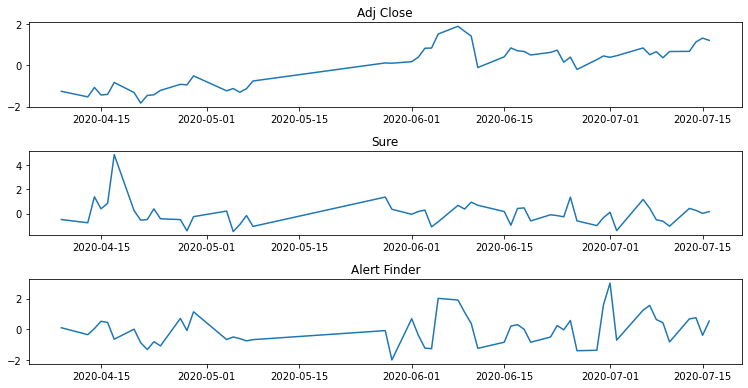

In [64]:
# Placing the plots in the plane
fig = plt.gcf()
fig.set_size_inches(10.5, 5.5)
n = 3
plot1 = plt.subplot2grid((n, n), (2, 0), colspan=3) 
plot2 = plt.subplot2grid((n, n), (1, 0), colspan=3) 
plot3 = plt.subplot2grid((n, n), (0, 0), colspan=3) 

# Graph details
plot1.plot(data2['Alert'])
plot1.set_title('Alert Finder')

plot2.plot(data2['Sure'])
plot2.set_title('Sure')

plot3.plot(data2['Adj Close'])
plot3.set_title('Adj Close')
  
# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

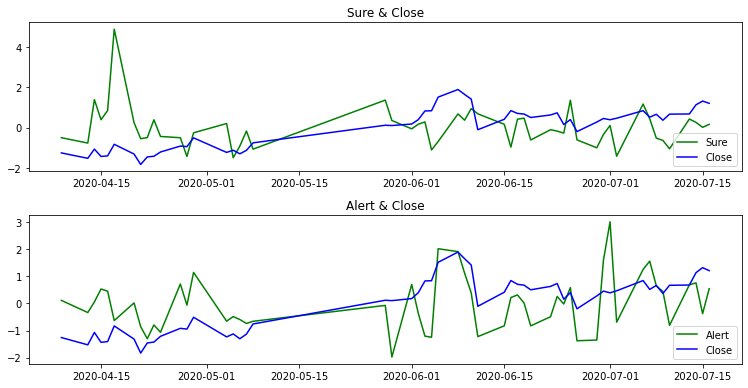

In [68]:
# Placing the plots in the plane
fig = plt.gcf()
fig.set_size_inches(10.5, 5.5)
n = 2
plot1 = plt.subplot2grid((n, n), (1, 0), colspan=3) 
plot2 = plt.subplot2grid((n, n), (0, 0), colspan=3) 

# Graph details
plot1.plot(data2['Alert'], c='g', label='Alert')
plot1.plot(data2['Adj Close'], c='b', label='Close')
plot1.legend(loc=4)
plot1.set_title('Alert & Close')

plot2.plot(data2['Sure'], c='g', label='Sure')
plot2.plot(data2['Adj Close'], c='b', label='Close')
plot2.legend(loc=4)
plot2.set_title('Sure & Close')

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()